In [8]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing

from sklearn.cluster import KMeans

In [9]:
att = ['noc', 'avg_age', 'avg_height', 'avg_weight', 'medals',
                    'global_gold','global_silver','global_bronze',
                    'swimming_gold','swimming_silver','swimming_bronze',
                    'gymnastics_gold','gymnastics_silver','gymnastics_bronze',
                    'hockey_gold','hockey_silver','hockey_bronze',
                    'rowing_gold','rowing_silver','rowing_bronze',
                    'football_gold','football_silver','football_bronze',
                    'sailing_gold','sailing_silver','sailing_bronze',
                    'cycling_gold','cycling_silver','cycling_bronze',
                    'fencing_gold','fencing_silver','fencing_bronze',
                    'athletics_gold','athletics_silver','athletics_bronze',
                    'canoeing_gold','canoeing_silver','canoeing_bronze',
                    'wrestling_gold','wrestling_silver','wrestling_bronze',
                    'shooting_gold','shooting_silver','shooting_bronze']

data = pd.io.parsers.read_csv(
    '../proj_datasets/dimensionality_reduction_input.csv',
    usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
             21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31,32,33,34,35,36,37,38,39,40,41,42,43],
    header=0)

nocs = data.values[:,0] ##just nocs

d_vals = data.loc[:, 'avg_age':'shooting_bronze'] ##just numbers

d_vals.infer_objects()

#cols = data.select_dtypes(exclude=['object']).columns
#data[cols] = data[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
#data = data.astype(np.float16)
#data = data.astype({"noc": str})
#data.infer_objects()
#data.convert_objects(convert_numeric=True)

#print(d_vals.dtypes)

d_vals.columns = att[1:]

print(d_vals.head())



   avg_age  avg_height  avg_weight  medals  global_gold  global_silver  \
0       27      176.39       72.87     432          123            119   
1       29      180.03       76.16     488          197            157   
2       25      177.88       71.19     743          188            243   
3       27      179.24       73.59    1122          322            367   
4       26      177.23       74.53    1035          421            305   

   global_bronze  swimming_gold  swimming_silver  swimming_bronze  \
0            190              0                1                3   
1            134              0                1                1   
2            312             30               48               36   
3            433             13               33               34   
4            309              5                5               17   

        ...         athletics_bronze  canoeing_gold  canoeing_silver  \
0       ...                       32              7                2

In [10]:

d = d_vals

d_pca = mlabPCA(d)

print(d_pca)

In [11]:
d_cov = np.cov(d.T)

#for i in range(len(d_cov)):
#    print('Variance original data not scaled axis n'+str(i),d_cov[i][i])

std_scale = preprocessing.StandardScaler().fit(d)
d_std = std_scale.transform(d)
d_cov = np.cov(d_std.T)
d_val, d_vec = np.linalg.eig(d_cov)
d_val.sort()

for i in range(len(d_val)):
    print(d_val[i])

print('Cumulated variance of the first two PCA components:',
      (d_val[-1]+d_val[-2])/sum(d_val))

-2.248113298424603e-15
-8.563276179753108e-16
8.945079717451727e-16
2.4803749514312236e-15
0.0006682289008642309
0.0017584963451141612
0.0018010810321255628
0.003301145657400657
0.004211084161444033
0.005561073446417875
0.006620503141670924
0.008133908202628937
0.013362067148865663
0.015575238697871443
0.01744945192570235
0.021575998955075112
0.03277265491510584
0.03697748476814664
0.05484222842532249
0.06359551332274634
0.06834055318187472
0.0780696611432873
0.11187689836480418
0.12418780810396166
0.1798641369370813
0.19883283869452534
0.2750769518459909
0.28052603676958504
0.3331591564987728
0.38847142194386103
0.4526484508013484
0.49454272089279255
0.5760425944396304
0.6467750110405206
0.7551934284777044
0.9702855068806104
1.2357288365562764
1.524130287960718
1.6335959689298638
2.280727220048983
3.504167446621978
3.6750019768484585
23.285893465786017
Cumulated variance of the first two PCA components: 0.6217725886964149


<function matplotlib.pyplot.show>

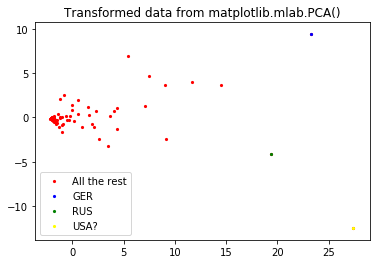

In [12]:
s = 10
plt.scatter(d_pca.Y[:, 0], d_pca.Y[0:, 1],
            color='red', s=s, lw=0, label='All the rest')
plt.scatter(d_pca.Y[20:21, 0], d_pca.Y[20:21, 1],
            color='blue', s=s, lw=0, label='GER')
plt.scatter(d_pca.Y[6:7, 0], d_pca.Y[6:7, 1],
            color='green', s=s, lw=0, label='RUS')
plt.scatter(d_pca.Y[9:10, 0], d_pca.Y[9:10, 1],
            color='yellow', s=s, lw=0, label='USA?')

plt.legend()
plt.title('Transformed data from matplotlib.mlab.PCA()')

plt.show

In [13]:
#print(type(d_pca.Y))
print(d_pca.Y.shape)
print(nocs.shape)

#new = np.append(d_pca.Y, nocs, axis=1)
#print(d_pca.Y[:, 0:2])

dim_red_output = {}

for i in range(len(d_pca.Y)):
    dim_red_output[nocs[i]] = {}
    dim_red_output[nocs[i]]['coord'] = d_pca.Y[i, 0:2]
    dim_red_output[nocs[i]]['meds'] = (int)(d_vals.iloc[i][3])
    
    
print(dim_red_output)

(120, 43)
(120,)
{'FIN': {'coord': array([ 3.44535779, -3.22508683]), 'meds': 432}, 'NOR': {'coord': array([ 4.38913025, -1.27470431]), 'meds': 488}, 'NED': {'coord': array([5.40547788, 6.90931367]), 'meds': 743}, 'FRA': {'coord': array([11.67050887,  3.95020281]), 'meds': 1122}, 'ITA': {'coord': array([9.02998944, 3.62519236]), 'meds': 1035}, 'ESP': {'coord': array([0.56579496, 1.99191422]), 'meds': 238}, 'RUS': {'coord': array([19.37807722, -4.07796925]), 'meds': 1992}, 'BLR': {'coord': array([-0.96446589,  0.00792408]), 'meds': 82}, 'CMR': {'coord': array([-1.78299652, -0.22238193]), 'meds': 20}, 'USA': {'coord': array([ 27.39585838, -12.53337408]), 'meds': 3488}, 'HUN': {'coord': array([7.13204939, 1.33314843]), 'meds': 812}, 'GRE': {'coord': array([ 0.15920523, -0.41238322]), 'meds': 190}, 'AUS': {'coord': array([7.50996972, 4.66220492]), 'meds': 1026}, 'IRI': {'coord': array([-1.26560435, -1.12934429]), 'meds': 44}, 'CAN': {'coord': array([4.31439134, 1.05338862]), 'meds': 571}, 

In [14]:
            
dro = open("../proj_datasets/dimensionality_reduction_output.csv", "w+")
writer_dro = csv.writer(dro, lineterminator='\n')


writer_dro.writerow(['noc','x', 'y'])
    
    
#print(dis_features)
#print(dis_parameters)


#print(dim_red_dic['USA'])


for i in dim_red_output:  
    writer_dro.writerow([i, dim_red_output[i]['coord'][0], dim_red_output[i]['coord'][1]])


dro.close()

[[ 2.4320933  -0.24482192]
 [ 9.20116476  3.10327485]
 [23.3869678  -8.30567167]
 [-1.75570662 -0.11593822]
 [23.31644061  9.44599547]]


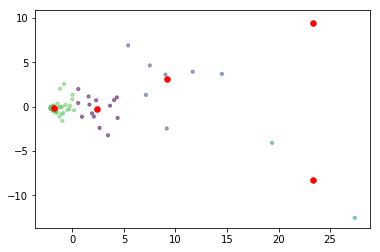

In [15]:
#read the csv output

att2 = ['noc', 'x', 'y']

data2 = pd.io.parsers.read_csv(
    '../proj_datasets/dimensionality_reduction_output.csv',
    usecols=[0, 1, 2],
    header=0)

d_vals2 = data2.loc[:, 'x':'y'] ##just numbers



kmeans = KMeans(n_clusters=5).fit(d_vals2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(d_vals2['x'], d_vals2['y'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=30)

In [16]:
with open('../proj_datasets/final_clustering.csv', 'w+') as final:
    kmeans_writer = csv.writer(final, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    kmeans_writer.writerow(['team','meds','x','y','cluster'])
    
    print(dim_red_output)
        
    for i,el in enumerate(dim_red_output):
        team=el
        #print(i, team)    
        x_v = dim_red_output[team]['coord'][0]
        y_v = dim_red_output[team]['coord'][1]
        m = dim_red_output[team]['meds']
        cluster = kmeans.labels_[i]
        
        kmeans_writer.writerow([team,m,x_v,y_v,cluster])

{'FIN': {'coord': array([ 3.44535779, -3.22508683]), 'meds': 432}, 'NOR': {'coord': array([ 4.38913025, -1.27470431]), 'meds': 488}, 'NED': {'coord': array([5.40547788, 6.90931367]), 'meds': 743}, 'FRA': {'coord': array([11.67050887,  3.95020281]), 'meds': 1122}, 'ITA': {'coord': array([9.02998944, 3.62519236]), 'meds': 1035}, 'ESP': {'coord': array([0.56579496, 1.99191422]), 'meds': 238}, 'RUS': {'coord': array([19.37807722, -4.07796925]), 'meds': 1992}, 'BLR': {'coord': array([-0.96446589,  0.00792408]), 'meds': 82}, 'CMR': {'coord': array([-1.78299652, -0.22238193]), 'meds': 20}, 'USA': {'coord': array([ 27.39585838, -12.53337408]), 'meds': 3488}, 'HUN': {'coord': array([7.13204939, 1.33314843]), 'meds': 812}, 'GRE': {'coord': array([ 0.15920523, -0.41238322]), 'meds': 190}, 'AUS': {'coord': array([7.50996972, 4.66220492]), 'meds': 1026}, 'IRI': {'coord': array([-1.26560435, -1.12934429]), 'meds': 44}, 'CAN': {'coord': array([4.31439134, 1.05338862]), 'meds': 571}, 'PAK': {'coord': 